### PCA 개요 

#### 붓꽃 데이터로 알아보는 PCA

##### 라이브러리 임포트

In [87]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

# 정규화 스케일링
from sklearn.preprocessing import StandardScaler

# 차원축소
from sklearn.decomposition import PCA

# RandomForest분류
from sklearn.ensemble import RandomForestClassifier

# 교차검증을 통한 평가
from sklearn.model_selection import cross_val_score

%matplotlib inline

##### 데이터셋 로드

In [ ]:
def load_datasets():
  """
  1.로드한 붓꽃 데이터셋을 데이터프레임으로 리턴
  2. 붓꽃 데이터셋을 ndarray타입으로 리턴
  """
  #사이킷런 내장 데이터셋 API호출
  # 사이킷런 내장 데이터 셋 API 호출
  iris = load_iris()
  cols = [feature.replace(' (cm)', '').replace(' ','_') for feature in iris.feature_names]

  irisDF = pd.DataFrame(data = iris.data, columns=cols)
  irisDF['TARGET'] = iris.target
  
  display(irisDF.head(n = 3))
  display(irisDF.columns)
  return irisDF, iris

# 수행  
irisDF, iris = load_datasets()

,sepal_length,sepal_width,petal_length,petal_width,TARGET
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'TARGET'], dtype='object')

##### 데이터 산포도 시각화
* **sepal_length, sepal_width 두개의 속성으로 데이터 산포도 시각화**

**Read Evaluate Print Loop**

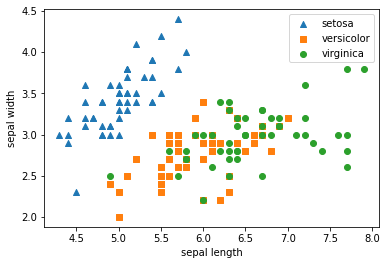

In [ ]:
pcaFlag = False

markers = ["^", "s", "o"]

#setosa - 0, versicolor - 1, virginica - 2
for i, marker in enumerate(markers):
  if pcaFlag:
    #pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행
    x = irisDF[irisDF["TARGET"] == i]["pca_component_1"]
    y = irisDF[irisDF["TARGET"] == i]["pca_component_2"]
    plt.scatter(x = x, y= y,marker = marker, label=iris.target_names[i])
    plt.xlabel("pca_component_1")
    plt.ylabel("pca_component_2")
  else:
    x = irisDF[irisDF["TARGET"] == i]["sepal_length"]
    y = irisDF[irisDF["TARGET"] == i]["sepal_width"]
    plt.scatter(x = x, y= y,marker = marker, label=iris.target_names[i])
    plt.xlabel("sepal length")
    plt.ylabel("sepal width")

plt.legend()
plt.show()

**모듈화**

In [ ]:
def iris_plot_scatter(df, pcaFlag = False):
  """
  PCA변환 전후의 산포도 비교
  """
  markers = ["^", "s", "o"]
  #setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot
  for i, marker in enumerate(markers):
    if pcaFlag:
      msg = "IRIS scatter after PCA"
      
      #pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행
      x = df[df["TARGET"] == i]["pca_component_1"]
      y = df[df["TARGET"] == i]["pca_component_2"]
      plt.xlabel("pca_component_1")
      plt.ylabel("pca_component_2")
      plt.scatter(x = x, y= y,marker = marker, label=iris.target_names[i])
    else:
      msg = "IRIS Scatter Before PCA"
      x = df[df["TARGET"] == i]["sepal_length"]
      y = df[df["TARGET"] == i]["sepal_width"]
      plt.xlabel("sepal length")
      plt.ylabel("sepal width")
      plt.scatter(x = x, y= y,marker = marker, label=iris.target_names[i])  

  display(msg) 
  plt.title = "{0}".format(msg)
  plt.legend()
  plt.show()

##### PCA변환을 위한 정규화 스케일링
* **평균이 0, 분산이 1인 정규 분포로 원본 데이터를 변환**

In [ ]:
def standard_scaled(df):
  """
  PCA전 정규분포 스케일링
  """
  scaler = StandardScaler()
  # 인자는 피처와 레이블값
  iris_scaled = scaler.fit_transform(df.iloc[:, :-1])

  display(iris_scaled.shape, iris_scaled[:2, :])

  return iris_scaled

# 정규화 스케일링
iris_scaled = standard_scaled(irisDF)

(150, 4)

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ]])

##### PCA 변환 수행

**Read Evaluate Print Loop**

In [ ]:
pca = PCA(n_components=2) # 2개의 컴포넌트로 PCA변환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

pca_cols = ["pca_component_1", "pca_component_2"]
iris_pca_df = pd.DataFrame(data = iris_pca, columns=pca_cols)
iris_pca_df["TARGET"] = iris.target

display(iris_pca_df.shape, iris_pca_df.head(3))

(150, 3)

,pca_component_1,pca_component_2,TARGET
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


**모듈화**

In [ ]:
def pca_decomp(scaled_data: np.ndarray):
  """
  인자로 받은 정규화된 데이터를 PCA변환 후 ndarray및 DataFrame타입으로 리턴
  """
  pca = PCA(n_components=2) # 2개의 컴포넌트로 PCA변환

  #fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
  pca.fit(scaled_data)
  iris_pca = pca.fit_transform(iris_scaled)

  # PCA 변환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
  # 가장 큰 변동성을 갖는 pca_component_1, 그 다음 변동성이 큰 피처 : pca_component_2
  pca_columns = ['pca_component_1', 'pca_component_2']
  iris_pca_df = pd.DataFrame(data = iris_pca, columns=pca_columns)
  iris_pca_df['TARGET'] = iris.target
  display(iris_pca_df.shape, iris_pca_df.head(3))
  display("PCA변동성 확인 : ", pca.explained_variance_)
  display("PCA변동성 비율 : ", pca.explained_variance_ratio_)

  return iris_pca, iris_pca_df, pca

# PCA수행 및 데이터프레임 리턴
iris_pca,irisDF_pca, pca  = pca_decomp(iris_scaled)

(150, 3)

,pca_component_1,pca_component_2,TARGET
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


'PCA변동성 확인 : '

array([2.93808505, 0.9201649 ])

'PCA변동성 비율 : '

array([0.72962445, 0.22850762])

In [ ]:
help(PCA)

##### PCA로 차원 축소된 피처들로 데이터 산포도 시각화

'IRIS scatter after PCA'

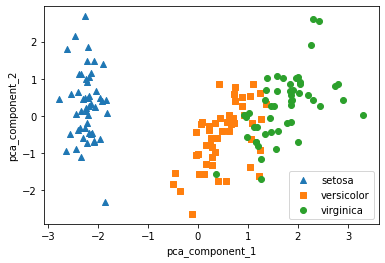

In [ ]:
iris_plot_scatter(iris_pca_df, pcaFlag=True)

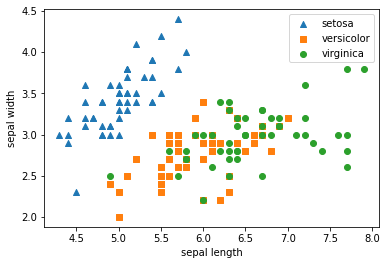

In [ ]:
iris_plot_scatter(irisDF, pcaFlag=False)

* **각 PCA Component별 변동성 비율**

In [ ]:
# PCA컴포넌트의 변동성 비율과 그 비율값의 합계
# 값을 합치면 1이라고 볼수있다.
# sepal length, sepal width 이렇게 두개의 피처만으로도 데이터셋의 변동성을 95퍼센트 이상
# 구분 가능함을 알수있습니다.
# 첫번째 축(pca_component_1) - 72퍼센트, 두번째 축(pca_component_2) - 23퍼센트 정도의 변동성의 설명이 된다.
display(pca.explained_variance_ratio_, np.sum(pca.explained_variance_ratio_))

array([0.72962445, 0.22850762])

0.9581320720000165

##### **원본 데이터와 PCA 변환된 데이터 기반에서 예측 성능 비교**
* Estimator는 RandomForestClassifier를 사용
* 평가도는 cross_val_score를 통해 평가

**Read Evaluate Print Loop**

In [ ]:
clf = RandomForestClassifier(n_estimators=500, max_depth=5, n_jobs=-1, random_state=156, warm_start=True)
scores = cross_val_score(clf, iris.data, iris.target, scoring='accuracy', cv = 10, n_jobs=-1,verbose=True)
display(scores)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.6s finished


array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.93333333, 0.86666667, 1.        , 1.        , 1.        ])

**모듈**

In [ ]:
def get_cross_score(clf, X, y):
  """
  변환된 전 데이터셋과 변환후의 데이터셋의 예측 성능 평가
  """
  scores = cross_val_score(clf,  X, y, scoring='accuracy', cv = 10, n_jobs=-1,verbose=True)
  display(type(scores), scores.shape)
  display("교차검증 점수 : ", scores)
  display("교차검증 평균", np.mean(scores))
  return scores

* PCA변환전의 교차검증 점수

In [ ]:
scores = get_cross_score(rf_clf, iris.data, iris.target)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.3s finished


numpy.ndarray

(10,)

'교차검증 점수 : '

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.93333333, 0.86666667, 1.        , 1.        , 1.        ])

'교차검증 평균'

0.96

* PCA변환된 데이터에 대한 예측 성능

In [ ]:
iris_pca_df = irisDF_pca.drop('TARGET', axis= 1, inplace=False, errors='ignore')
scores = get_cross_score(rf_clf, iris_pca_df, iris.target)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.2s finished


numpy.ndarray

(10,)

'교차검증 점수 : '

array([0.8       , 0.86666667, 0.93333333, 0.93333333, 0.86666667,
       0.8       , 0.86666667, 0.86666667, 1.        , 1.        ])

'교차검증 평균'

0.8933333333333333

##### 정리
* 원본 데이터 셋트 대비 예측 정확도는 PCA변환 차원 갯수에 따라 예측 성능이 떨어질수 밖에 없음
* 속성이 4개에서 2개로 감소하면서 예측성능이 10퍼센트 가까이 감소함
* 하지만 4개의 속성이 2개로, 속성갯수가 50퍼센트 감소한 것에 비해 상당부분 원본 데이터셋의 변동성을 유지하는 것으로 보임

#### 신용카드 데이터 세트 PCA 변환
* [UCI Machine leanring](https://archive.ics.uci.edu/ml/machine-learning-databases/)

##### **데이터 로드 및 컬럼명 변환**

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
%cd /content/drive/MyDrive/Colab Notebooks/datasets/creditcard/

/content/drive/MyDrive/Colab Notebooks/datasets/creditcard


**Read Evaluate Print Loop**

In [67]:
credit_card = pd.read_excel("pca_credit_card.xls",sheet_name="Data", header = 1)

credit_card.rename(columns = {"PAY_0": "PAY_1", "default payment next month": "default"}, inplace=True)

y_target  = credit_card["default"]
X_featues = credit_card.drop(labels="default", axis = 1, inplace=False, errors="ignore")

**함수**

In [69]:
def load_split_dataset():
  """
  1.엑셀파일을 읽어서 데이터프레임으로 생성
  2.컬럼명변경 및 피처 및 레이블 데이터셋으로 분할, 불필요한 컬럼 삭제(ID)
  3.데이터프레임, 분할된 레이블 및 피처 데이터셋 리턴
  """
  credit_card = pd.read_excel("pca_credit_card.xls",sheet_name="Data", header = 1)

  credit_card.rename(columns = {"PAY_0": "PAY_1", "default payment next month": "default"}, inplace=True)

  y_target  = credit_card["default"]
  X_featues = credit_card.drop(labels="default", axis = 1, inplace=False, errors="ignore")
  display(credit_card.shape)
  display(credit_card.head(n=3))
  return X_features, y_target, credit_card

# 함수 수행
X_features, y_target, credit_card = load_split_dataset()

(30000, 25)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [70]:
display(y_target.value_counts())

0    23364
1     6636
Name: default, dtype: int64

In [71]:
display(X_features.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

None

##### 피처간 상관도 시각화
* 피처간의 상관도가 높은 경우엔 차원축소의 효율이 좋음을 알수 있다.

In [73]:
import seaborn as sns

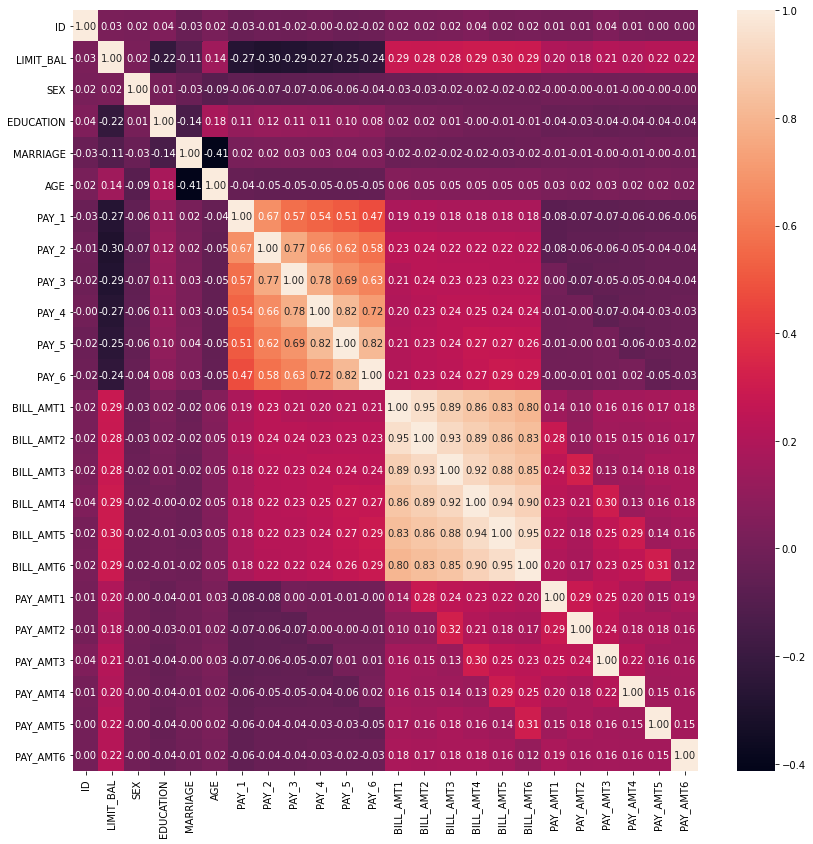

In [74]:
corr = X_featues.corr()
plt.figure(figsize = (14, 14))
# fmt옵션은 소숫점 자릿수 표현, annot옵션은 값표시 여부
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

**상관도가 높은 피처들의 PCA 변환 후 변동성 확인**
* BILL_AMT1 ~ BILL_AMT6 피처간의 상관도가 높게 나옴

In [75]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

**Read Evaluate Print Loop**
* StandardScaler 및 PCA

In [93]:
pcaCols = None

p = re.compile("(BILL)+")
scale_cols = [col for col in X_features.columns if p.search(col)]

scaler = StandardScaler()
pca = PCA(n_components = 2) # 6개의 컬럼를 2개로 압축
if scale_cols:
  scaled_data = scaler.fit_transform(X_features[scale_cols])  
  scaled_df = pca.fit_transform(scaled_data)
else:
  scaled_data = scaler.fit_transform(X_features)
  scaled_df =  pca.fit_transform(scaled_data)

display("변동성 비율", pca.explained_variance_ratio_)

'변동성 비율'

array([0.90555253, 0.0509867 ])

**차원축소 함수**

In [104]:
def feature_decomp(X, n_components=2, pca_cols=None):
  """
  상관관계가 높은 피처리스트와 피처 데이터 및 PCA변환 갯수를 인자로 받아서 PCA변환 후 변동성 확인
  1.정규화분포로 변환
  2.PCA변환
  3.PCA변환된 피처정보 및 PCA객체 리턴
  """
  scaler = StandardScaler()
  pca = PCA(n_components = 2) # 6개의 컬럼를 2개로 압축
  if pca_cols:
    scaled_data = scaler.fit_transform(X_features[pca_cols])  
    scaled_df = pca.fit_transform(scaled_data)
  else:
    scaled_data = scaler.fit_transform(X_features)
    scaled_df =  pca.fit_transform(scaled_data)

  print("PCA 컴포넌트별 변동성 비율 : ", pca.explained_variance_ratio_)
  return scaled_df, scaled_data, pca

**PCA수행**

In [101]:
# BILL1 ~ BILL6까지의 컬럼
p = re.compile("(BILL)+")

# 차원축소하고자 하는 피처 추출
scale_cols = [col for col in X_features.columns if p.search(col)]
scaled_df, scaled_data, pca = feature_decomp(X_features, 2, scale_cols)

PCA 컴포넌트별 변동성 비율 :  [0.90555253 0.0509867 ]


##### 원본 데이터 세트와 6개 컴포넌트로 PCA 변환된 데이터 세트로 분류 예측 성능 비교 

**PCA변환전의 데이터 예측 성능**

In [103]:
clf = RandomForestClassifier(n_estimators=1000, random_state=156, warm_start=True)
scores = get_cross_score(rf_clf, X_features, y_target)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.1min finished


numpy.ndarray

(10,)

'교차검증 점수 : '

array([0.80733333, 0.805     , 0.809     , 0.808     , 0.818     ,
       0.82066667, 0.836     , 0.82833333, 0.822     , 0.817     ])

'교차검증 평균'

0.8171333333333333

**PCA변환후의 데이터 예측성능**

* 상관도가 높은 BILL_AMT1 ~ BILL_AMT6컬럼만 변환

In [102]:
scores = get_cross_score(rf_clf, scaled_df, y_target)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   40.6s finished


numpy.ndarray

(10,)

'교차검증 점수 : '

array([0.743     , 0.758     , 0.747     , 0.738     , 0.742     ,
       0.75233333, 0.747     , 0.752     , 0.75433333, 0.75666667])

'교차검증 평균'

0.7490333333333333

* 모든 피처를 다 PCA차원 축소

In [105]:
scaled_df, scaled_data, pca = feature_decomp(X_features, 2)
scores = get_cross_score(rf_clf, scaled_df, y_target)

PCA 컴포넌트별 변동성 비율 :  [0.90555253 0.0509867 ]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   40.9s finished


numpy.ndarray

(10,)

'교차검증 점수 : '

array([0.743     , 0.758     , 0.747     , 0.738     , 0.742     ,
       0.75233333, 0.747     , 0.752     , 0.75433333, 0.75666667])

'교차검증 평균'

0.7490333333333333

##### 정리
* 상관도가 높은 피처들을 축소하는 경우, 예측성능이 원본 대비에 피처가 축소되더라도 예측성능이 차원 축소 전과 비교했을때에 비해는 떨어지지만 현격한 차이를 보일 정도로 예측 성능이 하락하지는 않음을 보여준다.